In [104]:
import sys
import pandas as pd
import yfinance as yf
import numpy as np

Get adjusted close price for all the stocks in S&P 500 index since 2015.

In [117]:
def get_tickers():
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    tickers_df = table[0]
    tickers_list = tickers_df['Symbol'].tolist()
    return tickers_list


tickers = get_tickers()
df = yf.download(tickers, start='2017-12-01', end='2022-12-31')['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


Resample adjusted close price to month periods and calculate log returns for each month. We will assume that the trade happens at the end of each month.
Compounded return is calculated since the begginning of each month. The return values in the dataframe are expressed in logarithimc rate of return.

In [118]:
def log_transform(values):
    
    return np.log(values).diff()

def get_log_returns(data):
    
    data.index = pd.to_datetime(data.index)
    data = data.resample('1M').last().apply(log_transform)
    data = data.iloc[1:]  #TODO: for first row make month count from first day, not previous month's price
    return data

returns = get_log_returns(df)
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0.092088,0.043072,0.160023,-0.010693,0.155892,0.082034,0.090204,0.001871,0.048513,0.130960,...,-0.017955,-0.052706,0.042829,-0.079321,0.057826,0.035864,0.052072,0.171018,0.061053,0.064714
2018-02-28,-0.068186,0.000632,-0.023699,0.065961,0.031662,-0.042404,-0.029882,-0.030140,0.001927,0.045839,...,0.014510,-0.053094,-0.131870,-0.081332,0.034491,-0.034064,-0.089388,0.114783,0.021105,0.052426
2018-03-31,-0.024948,-0.043129,0.037467,-0.059804,-0.201938,-0.098774,-0.006819,-0.030492,-0.047766,0.032693,...,0.084999,0.058354,-0.015032,-0.106458,0.030894,0.045050,-0.061813,0.007572,-0.041603,0.032247
2018-04-30,-0.015262,-0.190903,-0.035197,-0.015134,0.030180,0.049447,-0.025526,-0.065918,-0.006311,0.025225,...,0.020785,0.029465,0.041224,0.000596,-0.053677,0.022878,0.054694,-0.031825,0.037593,0.001107
2018-05-31,-0.059864,0.016445,0.116724,0.126742,0.024453,-0.093434,0.056843,-0.021189,0.029584,0.117703,...,0.055334,-0.028586,0.053994,-0.138938,-0.031979,-0.064227,-0.032295,0.129751,0.005254,0.002632
2018-06-30,-0.001293,-0.137147,0.054016,-0.009463,-0.065685,0.037397,-0.008815,0.011785,0.049175,-0.022188,...,-0.158138,0.012490,0.018175,0.001090,-0.043845,-0.038989,0.001555,-0.069174,-0.039447,0.017645
2018-07-31,0.068123,0.040780,0.039943,0.027599,0.005618,-0.041179,0.076436,0.144058,-0.026386,0.003562,...,-0.003352,0.025504,-0.014857,0.094541,0.127726,0.013586,0.118979,-0.037845,-0.018968,0.016496
2018-08-31,0.022459,0.026101,0.149660,0.182673,0.039854,0.099219,0.019641,0.000327,0.059335,0.074140,...,-0.111942,0.025078,-0.006315,-0.186613,-0.005774,0.095816,-0.015172,0.219235,0.035907,0.046541
2018-09-30,0.043460,0.020781,0.026231,-0.008338,-0.014694,0.024701,0.093077,-0.025175,0.006661,0.024145,...,-0.154847,-0.009785,0.058737,-0.053840,0.050851,0.045227,0.063333,0.029207,-0.060730,0.010540


Visualize monthly log returns of the exemplary stock in percentages.

Date
2018-01-31    0.215627
2018-02-28    0.041554
2018-03-31   -0.044003
2018-04-30    0.078880
2018-05-31    0.039739
2018-06-30    0.042164
2018-07-31    0.044664
2018-08-31    0.124308
2018-09-30   -0.004836
2018-10-31   -0.225887
2018-11-30    0.056070
2018-12-31   -0.118051
2019-01-31    0.134808
2019-02-28   -0.046993
2019-03-31    0.082442
2019-04-30    0.078681
2019-05-31   -0.081875
2019-06-30    0.064656
2019-07-31   -0.014281
2019-08-31   -0.049688
2019-09-30   -0.022995
2019-10-31    0.023203
2019-11-30    0.013496
2019-12-31    0.025786
2020-01-31    0.083480
2020-02-29   -0.064233
2020-03-31    0.034421
2020-04-30    0.238150
2020-05-31   -0.012867
2020-06-30    0.121834
2020-07-31    0.137249
2020-08-31    0.086601
2020-09-30   -0.091653
2020-10-31   -0.036409
2020-11-30    0.042523
2020-12-31    0.027672
2021-01-31   -0.015699
2021-02-28   -0.035968
2021-03-31    0.000372
2021-04-30    0.113920
2021-05-31   -0.073076
2021-06-30    0.065184
2021-07-31   -0.033270
2021-0

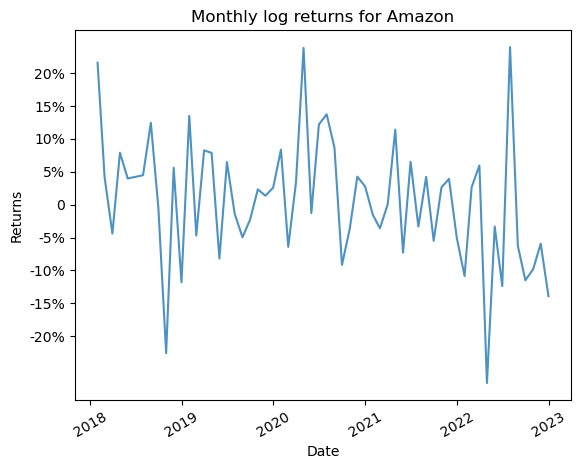

In [119]:
import matplotlib.pyplot as plt

print(returns['AMZN'])

plt.plot(returns.index, returns['AMZN'].fillna(0)*100, alpha = .8)
plt.title('Monthly log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=30) # rotating x-ticks
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()



Shifting returns to move through the time series.

In [120]:
def shift_returns(returns, n_shift):
    return returns.shift(n_shift)

previous_returns = shift_returns(returns, 1)
next_returns = shift_returns(returns, -1)


Date
2018-01-31    0.041554
2018-02-28   -0.044003
2018-03-31    0.078880
2018-04-30    0.039739
2018-05-31    0.042164
2018-06-30    0.044664
2018-07-31    0.124308
2018-08-31   -0.004836
2018-09-30   -0.225887
2018-10-31    0.056070
2018-11-30   -0.118051
2018-12-31    0.134808
2019-01-31   -0.046993
2019-02-28    0.082442
2019-03-31    0.078681
2019-04-30   -0.081875
2019-05-31    0.064656
2019-06-30   -0.014281
2019-07-31   -0.049688
2019-08-31   -0.022995
2019-09-30    0.023203
2019-10-31    0.013496
2019-11-30    0.025786
2019-12-31    0.083480
2020-01-31   -0.064233
2020-02-29    0.034421
2020-03-31    0.238150
2020-04-30   -0.012867
2020-05-31    0.121834
2020-06-30    0.137249
2020-07-31    0.086601
2020-08-31   -0.091653
2020-09-30   -0.036409
2020-10-31    0.042523
2020-11-30    0.027672
2020-12-31   -0.015699
2021-01-31   -0.035968
2021-02-28    0.000372
2021-03-31    0.113920
2021-04-30   -0.073076
2021-05-31    0.065184
2021-06-30   -0.033270
2021-07-31    0.042134
2021-0

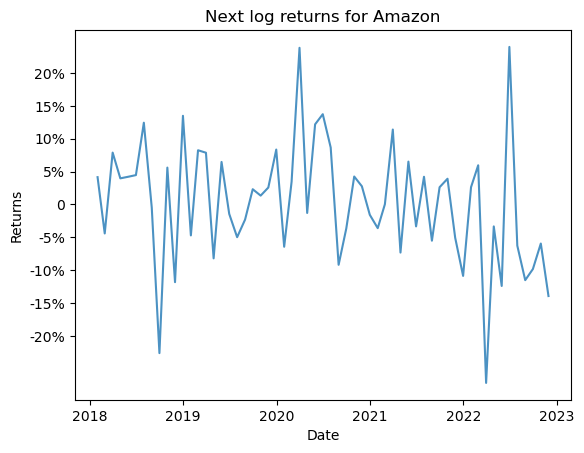

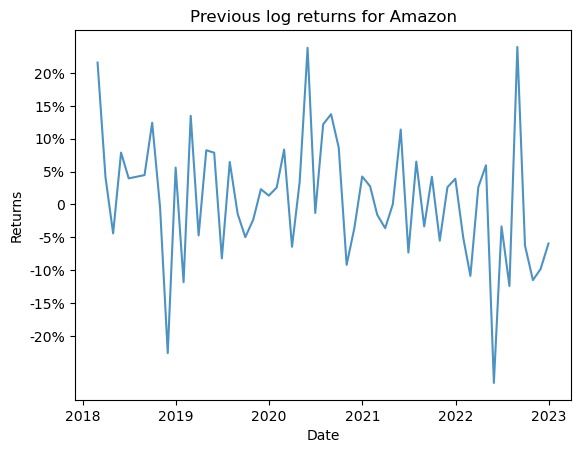

In [121]:
next_returns = returns.shift(-1)
previous_returns = returns.shift(1)
print(next_returns['AMZN'])
print(previous_returns['AMZN'])

plt.plot(next_returns.index, next_returns['AMZN']*100, alpha = .8)
plt.title('Next log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()

plt.plot(previous_returns.index, previous_returns['AMZN']*100, alpha = .8)
plt.title('Previous log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()

Get 10 best and worst performing stocks for each month to generate trading signals that will rebalance portfolio at the end of each month
by entering long position for the best 10 stocks and short position for 10 the worst.

In [122]:
def get_stocks(returns, n):

    
    best_stocks = pd.DataFrame(0, index=returns.index, columns=returns.columns)
    
    print(best_stocks.head())
    
    for idx, row in returns.iterrows():
        # ignore 0's in first row  
        indices = list(row[row != 0].nlargest(n).index)
        best_stocks.loc[idx][indices] = 1
        
    print(best_stocks)
    return best_stocks

n_stocks = 10
# replace NaN's with 0's 
long_df = get_stocks(previous_returns.fillna(0), n_stocks)
short_df = get_stocks(-1*previous_returns.fillna(0), n_stocks)

most_long_stocks = long_df.sum().sort_values(ascending=False).index[:10].values.tolist()
most_short_stocks = short_df.sum().sort_values(ascending=False).index[:10].values.tolist()

print(most_long_stocks)
print(most_short_stocks)

            A  AAL  AAP  AAPL  ABBV  ABC  ABT  ACGL  ACN  ADBE  ...  WYNN  \
Date                                                            ...         
2018-01-31  0    0    0     0     0    0    0     0    0     0  ...     0   
2018-02-28  0    0    0     0     0    0    0     0    0     0  ...     0   
2018-03-31  0    0    0     0     0    0    0     0    0     0  ...     0   
2018-04-30  0    0    0     0     0    0    0     0    0     0  ...     0   
2018-05-31  0    0    0     0     0    0    0     0    0     0  ...     0   

            XEL  XOM  XRAY  XYL  YUM  ZBH  ZBRA  ZION  ZTS  
Date                                                        
2018-01-31    0    0     0    0    0    0     0     0    0  
2018-02-28    0    0     0    0    0    0     0     0    0  
2018-03-31    0    0     0    0    0    0     0     0    0  
2018-04-30    0    0     0    0    0    0     0     0    0  
2018-05-31    0    0     0    0    0    0     0     0    0  

[5 rows x 503 columns]
         

Calculate net portofolio returns. We are assuming that every stock gets equal amount of investment - hence the porfolio return for each month is an arithmetic avarage of all individual stock returns. 

In [123]:
def calc_portfolio_returns(long_df, short_df, next_returns, n_stocks):
    
    long_pos = long_df * next_returns
    short_pos = short_df * next_returns
    portfolio_returns = (long_pos - short_pos)/n_stocks
    
    return portfolio_returns
    
exp_portoflio_returns = calc_portfolio_returns(long_df, short_df, next_returns, n_stocks*2)

Date
2018-01-31    0.000000
2018-02-28    0.004826
2018-03-31   -0.045667
2018-04-30    0.023131
2018-05-31   -0.011717
2018-06-30    0.005350
2018-07-31    0.036146
2018-08-31    0.022538
2018-09-30   -0.039748
2018-10-31   -0.029382
2018-11-30    0.041855
2018-12-31    0.062878
2019-01-31   -0.007796
2019-02-28   -0.005819
2019-03-31    0.038109
2019-04-30    0.008575
2019-05-31   -0.009313
2019-06-30    0.020041
2019-07-31   -0.006567
2019-08-31   -0.028844
2019-09-30    0.052677
2019-10-31   -0.052386
2019-11-30   -0.032047
2019-12-31    0.062719
2020-01-31    0.005884
2020-02-29   -0.054321
2020-03-31   -0.051782
2020-04-30   -0.010966
2020-05-31    0.012441
2020-06-30    0.053187
2020-07-31    0.017085
2020-08-31    0.012957
2020-09-30   -0.008457
2020-10-31   -0.107762
2020-11-30    0.026500
2020-12-31    0.053347
2021-01-31    0.049730
2021-02-28   -0.016087
2021-03-31    0.015179
2021-04-30    0.021655
2021-05-31   -0.017326
2021-06-30   -0.003308
2021-07-31    0.020721
2021-0

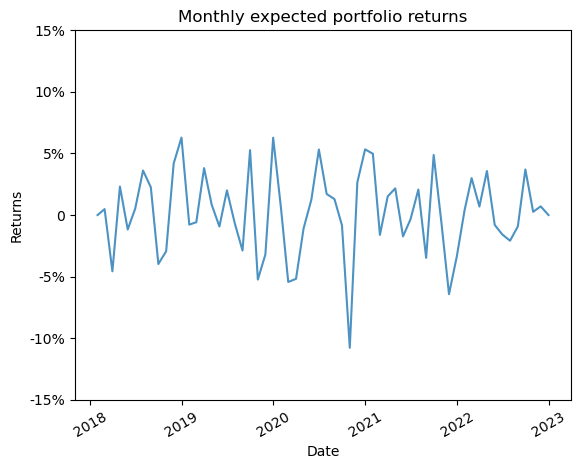

In [127]:
net_monthly_portolio_returns = exp_portoflio_returns.T.sum()
print(net_monthly_portolio_returns)

plt.plot(exp_portoflio_returns.index, net_monthly_portolio_returns*100, alpha = .8)
plt.title('Monthly expected portfolio returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=30) # rotating x-ticks
plt.yticks([0, 5, 10, 15, -5, -10, -15], 
           ['0', '5%', '10%', '15%', '-5%', '-10%', '-15%'])
plt.show()

In [135]:
mean_return = net_monthly_portolio_returns.mean()
standard_err = net_monthly_portolio_returns.sem()
return_annual_rate = (np.exp(mean_return  * 12) - 1) * 100

print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(mean_return, standard_err, return_annual_rate))



Mean:                       0.001787
Standard Error:             0.004385
Annualized Rate of Return:  177.72%



T-Test with null hypothesis that the mean return from the signal is 0. Assume alpha = 0.05 and reject null hypothesis if p-value < alpha.

In [136]:
from scipy import stats

def analyze_alpha(returns):
    
    t_value, p_value = stats.ttest_1samp(returns, 0)
    
    return t_value, p_value/2

t_value, p_value = analyze_alpha(net_monthly_portolio_returns)

print("""
Alpha analysis:
 t-value:        {:.3f}
 p-value:        {:.6f}
""".format(t_value, p_value))


Alpha analysis:
 t-value:        0.407
 p-value:        0.342582

